# TEST pyBioPlot package
** This notebook contains tests for all function contained in pyBioPlot package **

In [1]:
# For ipythoninline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import of required packages
import pandas as pd

# import all function from pyBioPlot
from pyBioPlot import *

---
# RNASeq plots

## volcano_plot

In [2]:
help(volcano_plot)

Help on function volcano_plot in module pyBioPlot:

volcano_plot(df, X, Y, FDR=0.05, X_cutoff=1, sig_color='0.40', non_sig_color='0.70', highlight_list=[], highlight_palette='Set1', **kwargs)
    Run a command line in the default shell and return the standard output
    @param  df  Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
                identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    @param  X   Name of the column for X plotting (usually log2FC)
    @param  Y   Name of the column for Y plotting (usually pvalue)
    @param  FDR false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 0.05]
    @param  X_cutoff    value for significance cut-off for the X axis [DEFAULT: 1]
    @param  sig_color   Color of the significant points [DEFAULT: "0.40"] 
    @param  non_sig_color Color of the non-sign

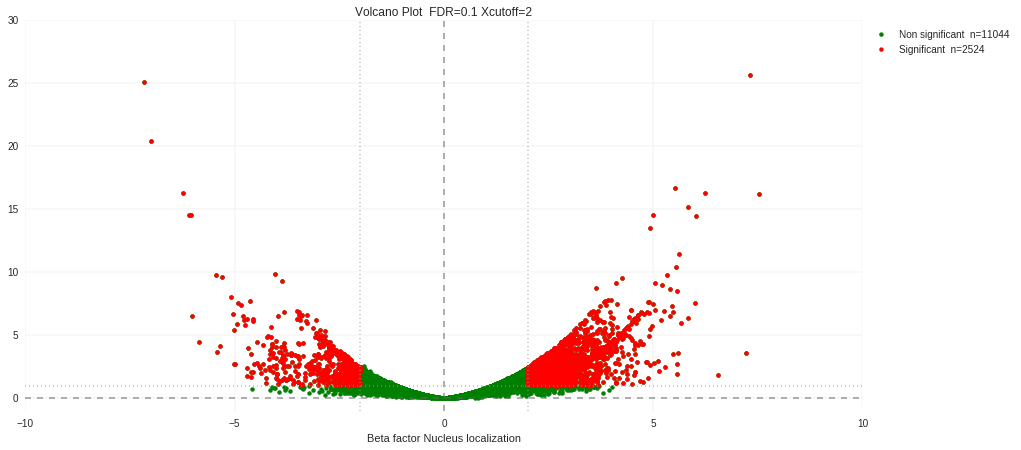

In [3]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
volcano_plot(df, "b", "qval", FDR=0.1, X_cutoff=2, figsize=[15,7], xlim=[-10,10], ylim=[-1, 30], sig_color="red",
             non_sig_color="green", xlabel="Beta factor Nucleus localization")

Target_id list of dataframe required for series #0. Skipping to the next one


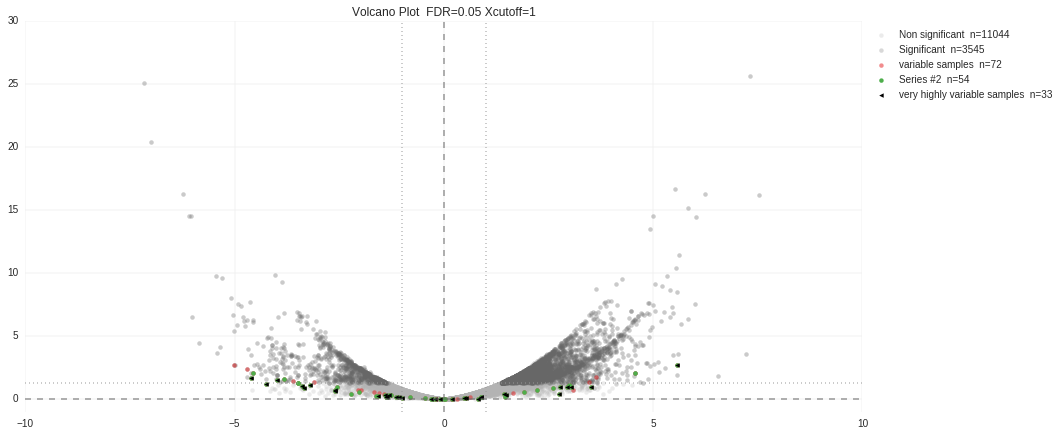

In [4]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
highlight_list = [
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 1.2)], "label":"variable samples", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 1.3)]},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"black", "label":"very highly variable samples", "marker":"<"}]

volcano_plot(df, "b", "qval", figsize=[15,7], xlim=[-10,10], ylim=[-1, 30], highlight_list= highlight_list,
             alpha=0.25)

## MA_plot

In [5]:
help(MA_plot)

Help on function MA_plot in module pyBioPlot:

MA_plot(df, X, Y, FDR=0.05, FDR_col='pval', sig_color='0.40', non_sig_color='0.70', highlight_list=[], highlight_palette='Set1', **kwargs)
    Run a command line in the default shell and return the standard output
    @param  df  Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
                identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    @param  X   Name of the column for X plotting (usually Mean expression)
    @param  Y   Name of the column for Y plotting (usually log2FC)
    @param  FDR false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 0.05]
    @param  FDR_col Name of the column to use to determine the significance cut-off (usually pvalue)
    @param  sig_color   Color of the significant points [DEFAULT: "0.40"] 
    @param  non_sig_color 

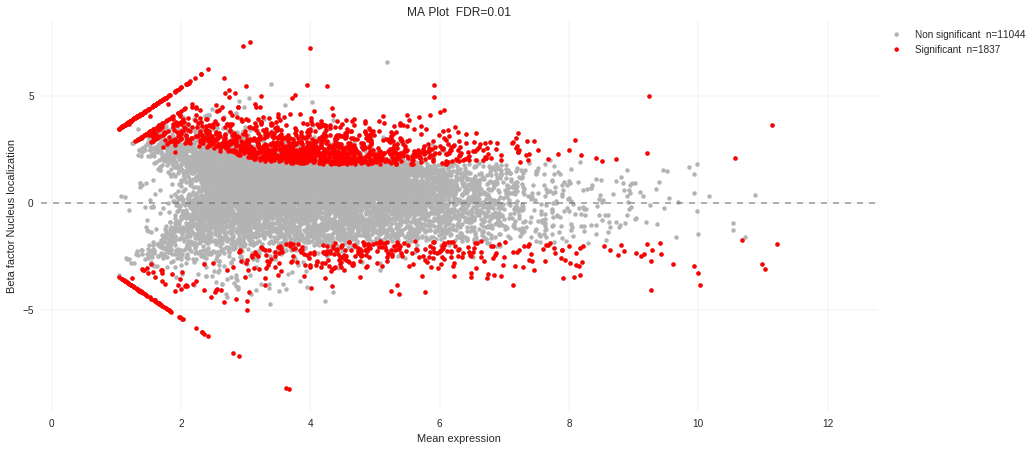

In [6]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
MA_plot(df, "mean_obs", "b", FDR=0.01, FDR_col="qval", figsize=[15,7], sig_color="red",
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization")

Target_id list of dataframe required for series #1. Skipping to the next one


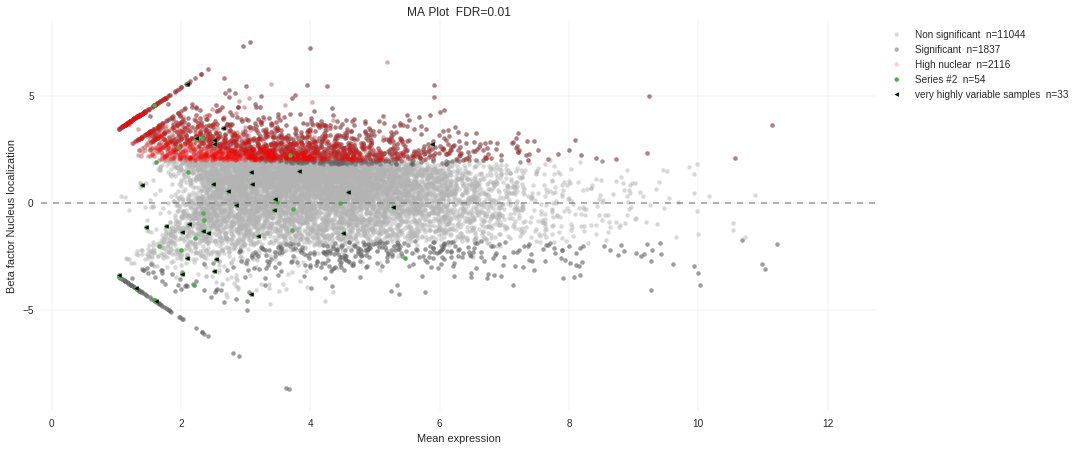

In [7]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")

df2 = df[(df.b>2)]

hl = [
    {"df":df2, "label":"High nuclear", "color":"red","alpha":0.2},
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 1.3)]},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"black", "label":"very highly variable samples", "alpha":1, "marker":"<"}]

MA_plot(
        df = df,
        X= "mean_obs",
        Y= "b",
        FDR=0.01,
        FDR_col="qval",
        highlight_list=hl,
        figsize=[15,7],
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization",
        alpha=0.5)

## density_plot

In [8]:
help(density_plot)

Help on function density_plot in module pyBioPlot:

density_plot(df, X, cumulative=False, cut=3, highlight_list=[], highlight_palette='Set1', **kwargs)
    Run a command line in the default shell and return the standard output
    @param  df  Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
                identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    @param  X   Name of the column to calculate density (usually Mean expression)
    @param  cumulative If true, will plot a cumulative distribution [DEFAULT: 1]
    @param  highlight_list  List of dictionaries for values to highlight. Each entry contains:
                [mandatory]     "target_id": List or pandas series of target_id matching target_id in the main df
            OR  [mandatory]     "df": A dataframe containing values with X and Y columns can be provided instead of the target_id list
     

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


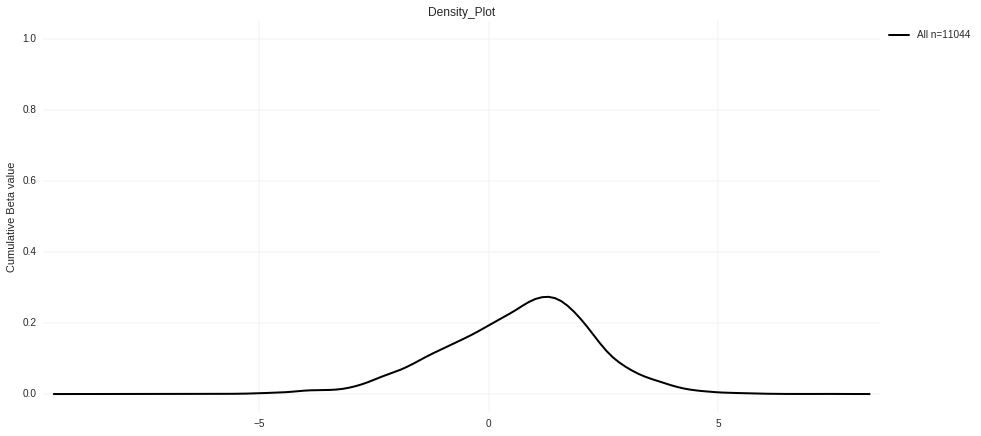

In [9]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
density_plot(df, "b", figsize=[15,7], ylabel="Cumulative Beta value")

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Target_id list of dataframe required for series #1. Skipping to the next one


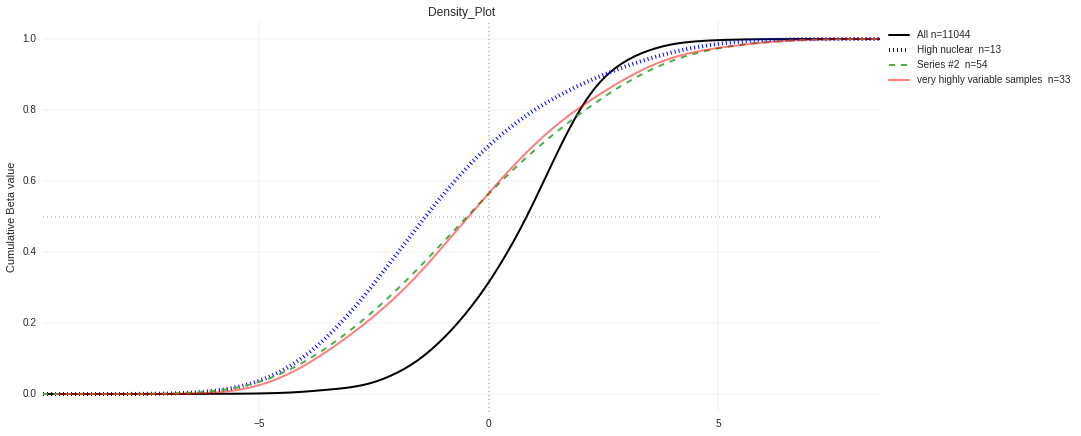

In [10]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")

df2 = df[(df.mean_obs>10)]

hl = [
    {"df":df2, "label":"High nuclear", "color":"blue","linestyle":':', "linewidth":4},
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 1.3)], "linestyle":'--'},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"red", "label":"very highly variable samples", "alpha":0.5, "marker":"<"}]


density_plot(df, "b", figsize=[15,7], ylabel="Cumulative Beta value", highlight_list= hl, cumulative = True, cut=5)

---
# Generic utilities

## get_color_list

In [11]:
help(get_color_list)

Help on function get_color_list in module pyBioPlot:

get_color_list(n, colormap='brg', plot_palette=False)
    Return a list of l length with gradient colors from a given matplot lib colormap palette
    @param n    Number of color scalar in the list
    @param  colormap    colormap color palette from matplotlib package see http://matplotlib.org/examples/color/colormaps_reference.html
                        example : inferno magma hot blues cool spring winter brg ocean hsv jet ... [DEFAULT: brg]
    @param  plot_palette    if True will plot the palette for visualization purpose [DEFAULT: False]
    @return A list of color codes that can be used for plotting



In [12]:
get_color_list(10)

<generator object get_color_list at 0x7f6597f4eb48>

In [13]:
a = get_color_list(20, colormap="plasma", plot_palette=True)
a = get_color_list(40, colormap="hot", plot_palette=True)
a = get_color_list(60, colormap="ocean", plot_palette=True)

## plot_text

In [14]:
help(plot_text)

Help on function plot_text in module pyBioPlot:

plot_text(text, plot_len=20, align='center', **kwargs)
    Plot a text alone as graph. Useful to separate series of data plots in interactive session.
    @param text Test message to plot
    @param len_plot Length of the plotting area [DEFAULT: 20]
    @param align    Alignment of the text ['left' | 'right' | 'center' ] [DEFAULT: 'center']
    @param kwargs   Additional parameters from matplotlib.text.Text class see http://matplotlib.org/users/text_intro.html
                    Examples = color, family, fontname, position...



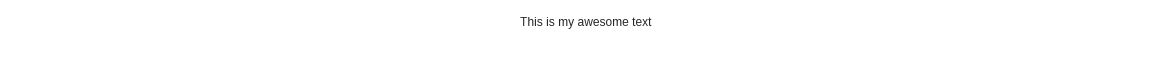

In [15]:
plot_text("This is my awesome text")

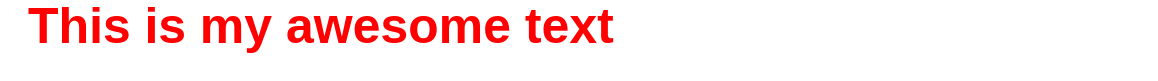

In [16]:
plot_text("This is my awesome text", align="left", color="red", fontsize=50, fontweight="bold")